In [1]:
# coding: utf-8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
plt.rcParams['font.sans-serif'] = 'SimHei' 
plt.rcParams['axes.unicode_minus'] = False   
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 导入训练集和测试集数据
data1 = pd.read_excel('训练集.xlsx',engine='openpyxl')
data2 = pd.read_excel('测试集.xlsx',engine='openpyxl')
print(data1)
print(data2)


    性别  age  CA199（0-37）    CEA  AFP（0-8.78）    PLT   WBC  APTT   TT   FIB  \
0    男   61        93.52   2.79         1.10  223.0  7.41  33.5  18.6  2.0   
1    女   67         7.24  13.11         1.10  264.0  5.11  35.8  13.8  2.9   
2    男   66        87.81  17.43         2.78  340.0  5.34  30.0  14.4  3.0   
3    男   34         8.97  31.73         3.17  279.0  7.61  29.8  14.4  2.9   
4    男   65         5.10   6.10         3.20  209.0  6.00  32.8  15.8  2.8   
..  ..  ...          ...    ...          ...    ...   ...   ...   ...  ...   
290  男   59         4.67   1.22        11.73  201.0  5.78  31.2  15.7  2.6   
291  男   38         3.12   2.89         4.07  372.0  4.07  30.4  14.6  4.2   
292  男   71         2.79   9.82         7.81   96.0  5.07  27.2  16.3  2.4   
293  男   59         1.15   1.33         2.35  504.0  5.89  38.2  15.5  4.2   
294  男   14        18.22   1.22         1.33  274.0  4.86  29.9  17.4  2.4   

       D2     TP    Alb    Glb   IBIL    AST      UA   BUN 是否结直

In [3]:
data1.info()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   性别           295 non-null    object 
 1   age          295 non-null    int64  
 2   CA199（0-37）  295 non-null    float64
 3   CEA          295 non-null    float64
 4   AFP（0-8.78）  295 non-null    float64
 5   PLT          295 non-null    float64
 6   WBC          295 non-null    float64
 7   APTT         295 non-null    float64
 8   TT           295 non-null    float64
 9   FIB          295 non-null    float64
 10  D2           295 non-null    float64
 11  TP           295 non-null    float64
 12  Alb          295 non-null    float64
 13  Glb          295 non-null    float64
 14  IBIL         295 non-null    float64
 15  AST          295 non-null    float64
 16  UA           295 non-null    float64
 17  BUN          295 non-null    float64
 18  是否结直肠癌       295 non-null    object 
dtypes: float

              age  CA199（0-37）         CEA  AFP（0-8.78）         PLT  \
count  295.000000   295.000000  295.000000   295.000000  295.000000   
mean    58.044068    37.914068   10.001458     3.305559  272.317627   
std     14.063562   166.052459   24.230763     3.766615   98.750089   
min     14.000000     1.000000    0.550000     0.390000   14.700000   
25%     50.000000     3.510000    1.855000     2.000000  210.500000   
50%     59.000000     8.450000    3.430000     2.750000  255.000000   
75%     67.000000    16.255000    6.850000     3.700000  315.500000   
max     89.000000  2029.430000  251.120000    58.600000  678.000000   

              WBC        APTT         TT          FIB          D2          TP  \
count  295.000000  295.000000  295.000000  295.000000  295.000000  295.000000   
mean     6.794373   30.795864   14.608746    3.557085    0.661153   67.479119   
std      2.299154    3.875480    2.261956    1.062883    0.842351    6.509156   
min      1.500000    1.330000   11.1

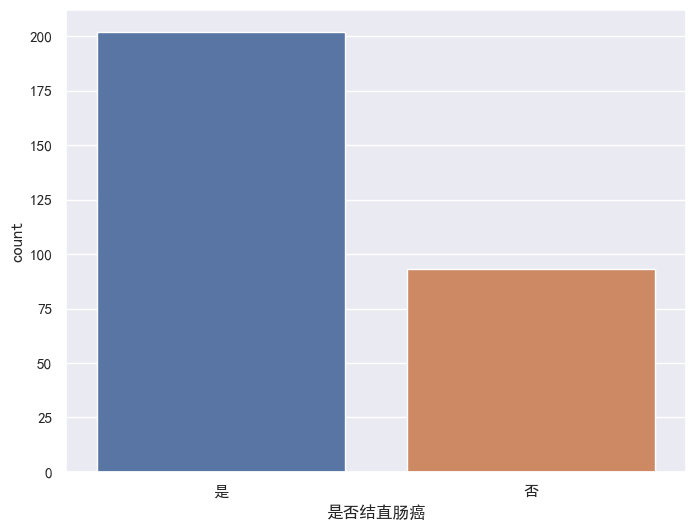

In [4]:
#  训练集的描述性统计

data1.select_dtypes('object').describe()
#  是否发病的直方图
fig,axes = plt.subplots(figsize = (8,6))
sns.countplot(x = '是否结直肠癌',data = data1)
print(data1.describe())
data1['是否结直肠癌'] = data1['是否结直肠癌'].replace("是",1).replace("否",0)
data1['是否结直肠癌'] = data1['是否结直肠癌'].astype('int64')

              age  CA199（0-37）         CEA  AFP（0-8.78）         PLT  \
count  192.000000   192.000000  192.000000   192.000000  192.000000   
mean    56.578125    15.139792    5.185677     5.577708  248.088542   
std     15.055713    29.965206    7.376873    26.126311   99.065357   
min     14.000000     0.860000    0.510000     0.550000   66.000000   
25%     49.000000     2.650000    1.437500     1.870000  189.750000   
50%     57.000000     6.285000    2.815000     2.610000  234.500000   
75%     68.000000    14.895000    5.160000     3.985000  293.250000   
max     87.000000   279.810000   68.270000   340.480000  645.000000   

              WBC        APTT         TT          FIB          D2          TP  \
count  192.000000  192.000000  192.000000  192.000000  192.000000  192.000000   
mean     6.496302   35.450521   18.273958    3.589948    0.697969   68.895573   
std      2.511183    5.959945    1.493984    1.133228    0.846800    7.345301   
min      2.040000   22.700000   15.4

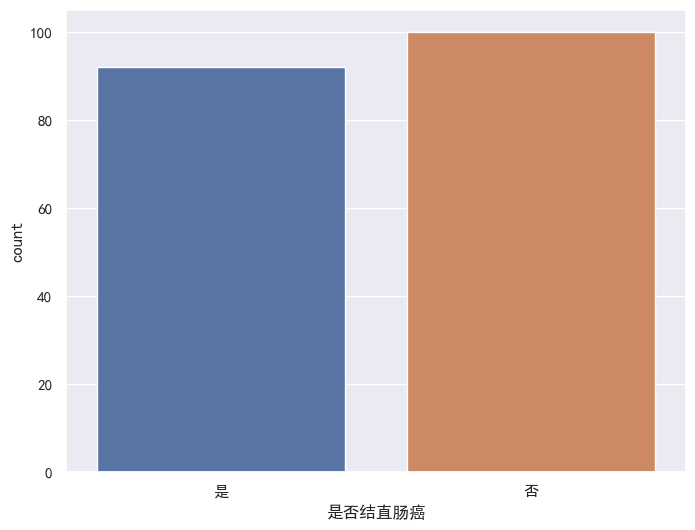

In [5]:
#  测试集的描述性统计

data2.select_dtypes('object').describe()
#  是否发病的直方图
fig,axes = plt.subplots(figsize = (8,6))
sns.countplot(x = '是否结直肠癌',data = data2)
print(data2.describe())
data2['是否结直肠癌'] = data2['是否结直肠癌'].replace("是",1).replace("否",0)
data2['是否结直肠癌'] = data2['是否结直肠癌'].astype('int64')

In [6]:
data1['属性'] = '训练集'
data2['属性'] = '测试集'
data =pd.concat([data1,data2],axis=0)

# 数据类型转换
dummies_性别 =pd.get_dummies(data['性别'],prefix='性别')
data_new =pd.concat([data, dummies_性别],axis=1)
data_new.drop(['性别']  ,axis=1,inplace=True)

In [7]:
data_new1 = data_new[data_new['属性']== "训练集"]
data_new1 = data_new1.drop(['属性'],axis=1)
data_new2 = data_new[data_new['属性']== "测试集"]
data_new2 = data_new2.drop(['属性'],axis=1)
data_new1.info()
data_new2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 0 to 294
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          295 non-null    int64  
 1   CA199（0-37）  295 non-null    float64
 2   CEA          295 non-null    float64
 3   AFP（0-8.78）  295 non-null    float64
 4   PLT          295 non-null    float64
 5   WBC          295 non-null    float64
 6   APTT         295 non-null    float64
 7   TT           295 non-null    float64
 8   FIB          295 non-null    float64
 9   D2           295 non-null    float64
 10  TP           295 non-null    float64
 11  Alb          295 non-null    float64
 12  Glb          295 non-null    float64
 13  IBIL         295 non-null    float64
 14  AST          295 non-null    float64
 15  UA           295 non-null    float64
 16  BUN          295 non-null    float64
 17  是否结直肠癌       295 non-null    int64  
 18  性别_女         295 non-null    bool   
 19  性别_男         

In [8]:
#  特征和标签划分；
x_train = data_new1.drop(['是否结直肠癌'],axis=1)
y_train = data_new1['是否结直肠癌']

x_test = data_new2.drop(['是否结直肠癌'],axis=1)
y_test = data_new2['是否结直肠癌']

In [9]:
# 归一化处理
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# x_train = ss.fit_transform(x_train)
# x_test = ss.transform(x_test)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 定义需要调优的参数网格
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [0.5, 0.8, 1.0]
}

# 创建随机森林分类器
RFmodel = RandomForestClassifier(n_jobs=-1, random_state=123)

# 使用GridSearchCV进行网格搜索
grid_search = GridSearchCV(estimator=RFmodel, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# 输出最优参数和最优模型
print("最优参数：", grid_search.best_params_)
print("最优模型对象：", grid_search.best_estimator_)

# 使用最优模型进行训练和预测
best_RFmodel = grid_search.best_estimator_
train_RFpred = best_RFmodel.predict(x_train)
test_RFpred = best_RFmodel.predict(x_test)


最优参数： {'max_depth': 10, 'max_features': 1.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
最优模型对象： RandomForestClassifier(max_depth=10, max_features=1.0, min_samples_leaf=4,
                       min_samples_split=10, n_jobs=-1, random_state=123)


In [11]:
# 混淆矩阵
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,roc_curve, auc
print('RF_train\nconfusion_matrix\n',confusion_matrix(y_true=y_train, y_pred= train_RFpred ))
print('classification report\n',classification_report(y_true=y_train, y_pred= train_RFpred))
print('RF_test\nconfusion_matrix\n', confusion_matrix(y_true=y_test, y_pred= test_RFpred ))
print('classification report\n',classification_report(y_true=y_test, y_pred= test_RFpred ))

RF_train
confusion_matrix
 [[ 82  11]
 [  2 200]]
classification report
               precision    recall  f1-score   support

           0       0.98      0.88      0.93        93
           1       0.95      0.99      0.97       202

    accuracy                           0.96       295
   macro avg       0.96      0.94      0.95       295
weighted avg       0.96      0.96      0.96       295

RF_test
confusion_matrix
 [[62 38]
 [11 81]]
classification report
               precision    recall  f1-score   support

           0       0.85      0.62      0.72       100
           1       0.68      0.88      0.77        92

    accuracy                           0.74       192
   macro avg       0.76      0.75      0.74       192
weighted avg       0.77      0.74      0.74       192



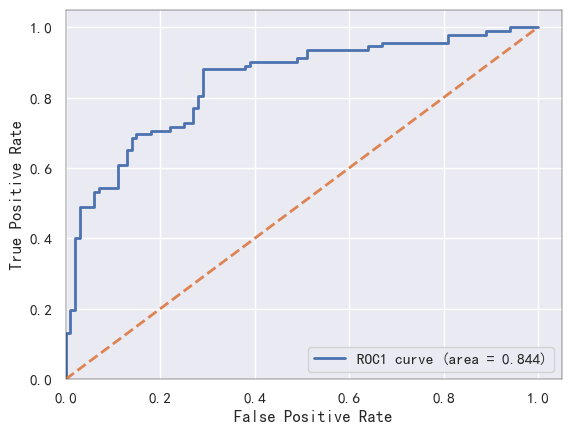

In [12]:
# 测试集拟合的ROC曲线 
y_predRFprob1 = best_RFmodel.predict_proba(x_test)[:, 1]
fpr1, tpr1, threshold1 = roc_curve(y_test, y_predRFprob1)  
RFroc_auc = auc(fpr1, tpr1) 

plt.plot(fpr1, tpr1, linewidth=2, label='ROC1 curve (area = %0.3f)' % RFroc_auc)  
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.ylim(0, 1.05) 
plt.xlim(0, 1.05)  
plt.legend(loc=4)  
plt.rcParams['axes.facecolor'] = 'white'
for spine in plt.gca().spines.values():
        spine.set_edgecolor('black')  
        spine.set_linewidth(0.3)  
plt.show()


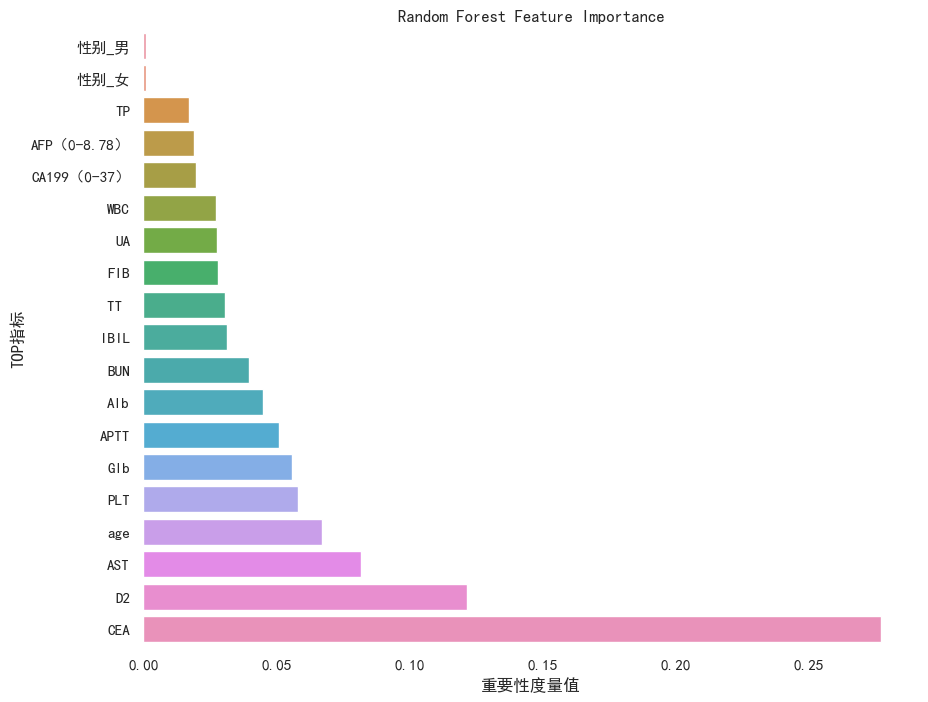

In [13]:
# 特征重要性
feature_names = x_train.columns
features_importances = best_RFmodel.feature_importances_
features_importance_pairs = [(feature_name, features_importance) for feature_name, features_importance in
                             zip(feature_names, features_importances)]
features_importance_pairs = sorted(features_importance_pairs, key=lambda x: x[1], reverse=True)

features_importance_name = [name[0] for name in features_importance_pairs]
features_importance_val = [name[1] for name in features_importance_pairs]

# 数据格式
data_rf = pd.DataFrame()  
data_rf['TOP指标'] = features_importance_name
data_rf['重要性度量值'] = features_importance_val

# 改为降序
data_rf = data_rf.sort_values(by=['重要性度量值'], ascending=True)
data_rf


# 设置图形大小
plt.figure(figsize=(10, 8))

# 创建垂直条形图
sns.barplot(x='重要性度量值', y='TOP指标', data=data_rf)

# 添加标题和标签
plt.title('Random Forest Feature Importance')
plt.xlabel('重要性度量值')
plt.ylabel('TOP指标')

# 显示图形
plt.show()

In [14]:
#MLP
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# 定义需要调优的参数网格
params = {
    'activation': ['tanh', 'relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'hidden_layer_sizes': [(50,), (50, 50), (100,)],
}

# 创建MLPClassifier模型
MLPmodel = MLPClassifier(random_state=0)

# 使用GridSearchCV进行网格搜索
grid_search = GridSearchCV(estimator=MLPmodel, param_grid=params, cv=5)
grid_search.fit(x_train, y_train)

# 输出最优参数和最优模型
print("模型的最优参数：", grid_search.best_params_)
print("最优模型对象：", grid_search.best_estimator_)

# 使用最优模型进行训练和预测
best_MLPmodel = grid_search.best_estimator_
train_MLPpred = best_MLPmodel.predict(x_train)
test_MLPpred = best_MLPmodel.predict(x_test)



模型的最优参数： {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50)}
最优模型对象： MLPClassifier(activation='logistic', alpha=0.01, hidden_layer_sizes=(50, 50),
              random_state=0)


In [15]:
# 混淆矩阵
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,roc_curve, auc
# 训练集的混淆矩阵
print('RF_train\nconfusion_matrix\n',confusion_matrix(y_true=y_train, y_pred= train_MLPpred ))
print('classification report\n',classification_report(y_true=y_train, y_pred= train_MLPpred))
# 测试集的混淆矩阵
print('RF_test\nconfusion_matrix\n', confusion_matrix(y_true=y_test, y_pred= test_MLPpred ))
print('classification report\n',classification_report(y_true=y_test, y_pred= test_MLPpred ))

RF_train
confusion_matrix
 [[ 63  30]
 [ 13 189]]
classification report
               precision    recall  f1-score   support

           0       0.83      0.68      0.75        93
           1       0.86      0.94      0.90       202

    accuracy                           0.85       295
   macro avg       0.85      0.81      0.82       295
weighted avg       0.85      0.85      0.85       295

RF_test
confusion_matrix
 [[45 55]
 [13 79]]
classification report
               precision    recall  f1-score   support

           0       0.78      0.45      0.57       100
           1       0.59      0.86      0.70        92

    accuracy                           0.65       192
   macro avg       0.68      0.65      0.63       192
weighted avg       0.69      0.65      0.63       192



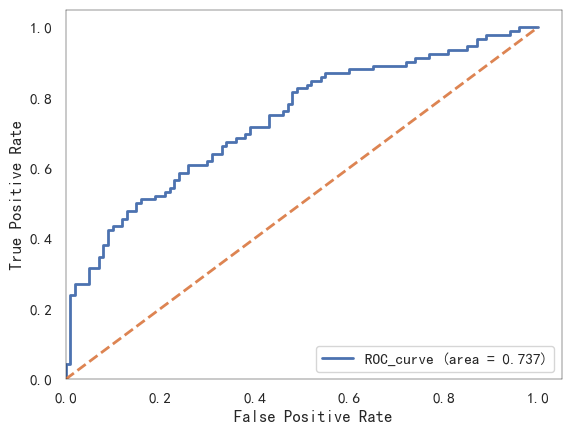

In [16]:
# ROC曲线 
y_predMLPprob = best_MLPmodel.predict_proba(x_test)[:, 1]
fpr3,tpr3,threshold3 = roc_curve(y_test, y_predMLPprob) 
MLProc_auc = auc(fpr3,tpr3) 
plt.plot(fpr3, tpr3, linewidth=2, label='ROC_curve (area = %0.3f)' % MLProc_auc)  
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.ylim(0,1.05) 
plt.xlim(0,1.05)  
plt.legend(loc=4)  
plt.rcParams['axes.facecolor'] = 'white'
for spine in plt.gca().spines.values():
        spine.set_edgecolor('black')  
        spine.set_linewidth(0.3)       
plt.show()  

In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# 创建XGBoost分类器
XGBmodel = xgb.XGBClassifier(random_state=123)

# 定义需要调优的参数网格
param_grid = { 
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

# 使用GridSearchCV进行网格搜索
grid_search = GridSearchCV(estimator=XGBmodel, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# 输出最优参数和最优模型
print("最优参数：", grid_search.best_params_)
print("最优模型对象：", grid_search.best_estimator_)

# 使用最优模型进行训练和预测
best_XGBmodel = grid_search.best_estimator_
train_XGBpred = best_XGBmodel.predict(x_train)
test_XGBpred = best_XGBmodel.predict(x_test)

# 计算准确率
train_accuracy = accuracy_score(y_train, train_XGBpred)
test_accuracy = accuracy_score(y_test, test_XGBpred)

print(f"训练集准确率：{train_accuracy:.4f}")
print(f"测试集准确率：{test_accuracy:.4f}")



最优参数： {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
最优模型对象： XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)
训练集准确率：0.9932
测试集准确率：0.7656


In [18]:
# 混淆矩阵
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,roc_curve, auc
# 训练集的混淆矩阵
print('XGB_train\nconfusion_matrix\n',confusion_matrix(y_true=y_train, y_pred= train_XGBpred ))
print('classification report\n',classification_report(y_true=y_train, y_pred= train_XGBpred))
# 测试集的混淆矩阵
print('XGB_test\nconfusion_matrix\n', confusion_matrix(y_true=y_test, y_pred= test_XGBpred ))
print('classification report\n',classification_report(y_true=y_test, y_pred= test_XGBpred ))

XGB_train
confusion_matrix
 [[ 91   2]
 [  0 202]]
classification report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        93
           1       0.99      1.00      1.00       202

    accuracy                           0.99       295
   macro avg       1.00      0.99      0.99       295
weighted avg       0.99      0.99      0.99       295

XGB_test
confusion_matrix
 [[76 24]
 [21 71]]
classification report
               precision    recall  f1-score   support

           0       0.78      0.76      0.77       100
           1       0.75      0.77      0.76        92

    accuracy                           0.77       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.77      0.77      0.77       192



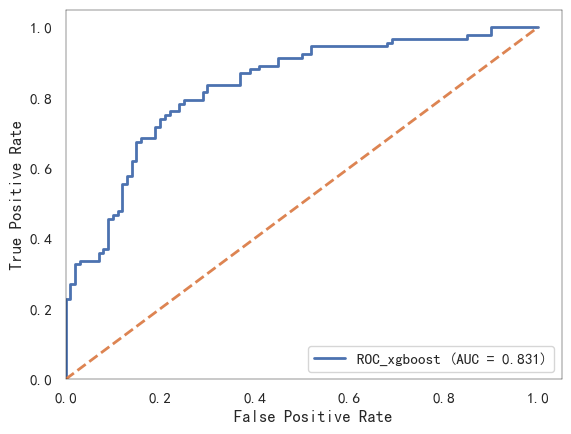

In [19]:
# ROC曲线 
y_predXGBprob = best_XGBmodel.predict_proba(x_test)[:, 1]
fpr5,tpr5,threshold5 = roc_curve(y_test, y_predXGBprob) 
XGBroc_auc = auc(fpr5,tpr5) 
plt.plot(fpr5, tpr5, linewidth=2, label='ROC_xgboost (AUC = %0.3f)' % XGBroc_auc)  
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.ylim(0,1.05) 
plt.xlim(0,1.05)  
plt.legend(loc=4)  
plt.rcParams['axes.facecolor'] = 'white'
for spine in plt.gca().spines.values():
        spine.set_edgecolor('black')  
        spine.set_linewidth(0.3)  
plt.show()  

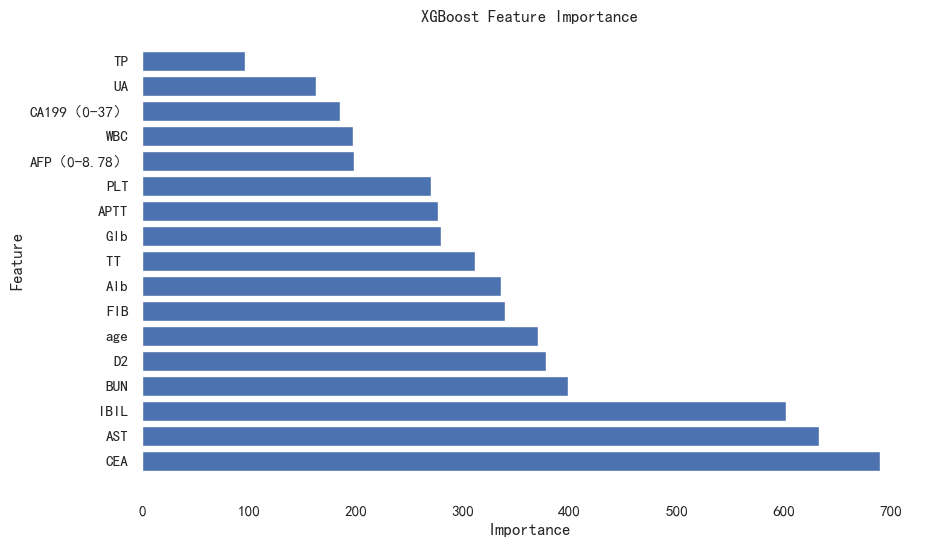

In [20]:
# 获取特征重要性
feature_importance = best_XGBmodel.get_booster().get_score(importance_type='weight')

# 将特征重要性转换为DataFrame以便于可视化
feature_importance_df = pd.DataFrame(list(feature_importance.items()), columns=['Feature', 'Importance'])

# 按重要性降序排序
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.show()

In [21]:
# 对测试集数据进行预测
yf_pred_RFproba = best_RFmodel.predict_proba(x_test)[:, 1]
yf_pred_XGBproba = best_XGBmodel.predict_proba(x_test)[:, 1]
yf_pred_NNproba = best_MLPmodel.predict_proba(x_test)[:, 1]

# 将预测结果添加到DataFrame中
data2['是患者的概率_RF'] = yf_pred_RFproba
data2['是患者的概率_XGB'] = yf_pred_XGBproba
data2['是患者的概率_NN'] = yf_pred_NNproba

# 将DataFrame保存为Excel文件
data2.to_excel('../测试集预测结果.xlsx', index=False)


PermissionError: [Errno 13] Permission denied: '../测试集预测结果.xlsx'

In [ ]:
# 绘制三个模型的ROC曲线
plt.figure(figsize=(8, 5), dpi=100)

# 绘制神经网络 ROC 曲线
y_predMLPprob = best_MLPmodel.predict_proba(x_test)[:, 1]
fpr3, tpr3, threshold3 = roc_curve(y_test, y_predMLPprob)
MLProc_auc = auc(fpr3, tpr3)
plt.plot(fpr3, tpr3, linewidth=2, label='Neural Network (AUC = %0.3f)' % MLProc_auc)

# 绘制随机森林 ROC 曲线
y_predRFprob1 = best_RFmodel.predict_proba(x_test)[:, 1]
fpr1, tpr1, threshold1 = roc_curve(y_test, y_predRFprob1)
RFroc_auc = auc(fpr1, tpr1)
plt.plot(fpr1, tpr1, linewidth=2, label='RandomForest (AUC = %0.3f)' % RFroc_auc)

# 绘制XGBoost ROC 曲线
y_predXGBprob = best_XGBmodel.predict_proba(x_test)[:, 1]
fpr5, tpr5, threshold5 = roc_curve(y_test, y_predXGBprob)
XGBroc_auc = auc(fpr5, tpr5)
plt.plot(fpr5, tpr5, linewidth=2, label='XGBoost (AUC = %0.3f)' % XGBroc_auc)

# 绘制对角线
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')

# 设置图表属性
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(0, 1.05)
plt.xlim(0, 1.05)
plt.legend(loc=4)

# 设置背景颜色和边框
plt.rcParams['axes.facecolor'] = 'white'
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.3)

# 显示图表
plt.show()

